# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import chisquare
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, det_curve, precision_recall_curve, roc_auc_score
from sklearn.metrics import DetCurveDisplay, RocCurveDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

from itertools import cycle

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, ShuffleSplit, StratifiedKFold
from sklearn.utils import compute_class_weight

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import export_text
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, label_binarize

from xgboost import XGBClassifier, plot_importance

## Loading the data

In [2]:
file = 'Loan_Data_Preprocessed_Final1.csv'
df = pd.read_csv(file, sep=',')

In [3]:
df.head()

,Unnamed: 0,Sal_Flag,Salaried_Self,Loan_sub_type_1,Doc_form_16,Pprty_Ins_Amt_cat,City_tier,All_enq_bins,All_Delq_TL,no_of_years_min_bins,All_no_of_loans,Active_loans,LTV,Tenure_Years,EMI,income_sum_box,Status
0,0,1,1,0,0,0,0,3,1,0,2,2,0.715563,20,5196,1.824110,1
1,1,0,2,4,0,0,2,2,0,1,2,1,0.544463,15,12511,1.828274,1
2,2,0,2,4,0,0,2,0,1,2,1,2,0.566012,20,11431,1.827793,1
3,3,1,1,1,0,0,0,0,1,4,1,1,0.536455,20,18920,1.829882,1
4,4,1,1,0,0,1,0,0,1,4,0,0,0.511949,27,10838,1.826468,1


In [4]:
df.shape

(13033, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13033 entries, 0 to 13032
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            13033 non-null  int64  
 1   Sal_Flag              13033 non-null  int64  
 2   Salaried_Self         13033 non-null  int64  
 3   Loan_sub_type_1       13033 non-null  int64  
 4   Doc_form_16           13033 non-null  int64  
 5   Pprty_Ins_Amt_cat     13033 non-null  int64  
 6   City_tier             13033 non-null  int64  
 7   All_enq_bins          13033 non-null  int64  
 8   All_Delq_TL           13033 non-null  int64  
 9   no_of_years_min_bins  13033 non-null  int64  
 10  All_no_of_loans       13033 non-null  int64  
 11  Active_loans          13033 non-null  int64  
 12  LTV                   13033 non-null  float64
 13  Tenure_Years          13033 non-null  int64  
 14  EMI                   13033 non-null  int64  
 15  income_sum_box     

### Dropping unncessesary column

In [6]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
df.head()

,Sal_Flag,Salaried_Self,Loan_sub_type_1,Doc_form_16,Pprty_Ins_Amt_cat,City_tier,All_enq_bins,All_Delq_TL,no_of_years_min_bins,All_no_of_loans,Active_loans,LTV,Tenure_Years,EMI,income_sum_box,Status
0,1,1,0,0,0,0,3,1,0,2,2,0.715563,20,5196,1.824110,1
1,0,2,4,0,0,2,2,0,1,2,1,0.544463,15,12511,1.828274,1
2,0,2,4,0,0,2,0,1,2,1,2,0.566012,20,11431,1.827793,1
3,1,1,1,0,0,0,0,1,4,1,1,0.536455,20,18920,1.829882,1
4,1,1,0,0,1,0,0,1,4,0,0,0.511949,27,10838,1.826468,1


In [8]:
df.shape

(13033, 16)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13033 entries, 0 to 13032
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sal_Flag              13033 non-null  int64  
 1   Salaried_Self         13033 non-null  int64  
 2   Loan_sub_type_1       13033 non-null  int64  
 3   Doc_form_16           13033 non-null  int64  
 4   Pprty_Ins_Amt_cat     13033 non-null  int64  
 5   City_tier             13033 non-null  int64  
 6   All_enq_bins          13033 non-null  int64  
 7   All_Delq_TL           13033 non-null  int64  
 8   no_of_years_min_bins  13033 non-null  int64  
 9   All_no_of_loans       13033 non-null  int64  
 10  Active_loans          13033 non-null  int64  
 11  LTV                   13033 non-null  float64
 12  Tenure_Years          13033 non-null  int64  
 13  EMI                   13033 non-null  int64  
 14  income_sum_box        13033 non-null  float64
 15  Status             

### Renaming features

In [10]:
df.rename(columns={'City_tier': 'City Tier',
                  'Pprty_Ins_Amt_cat': 'Property Insurance',
                  'Sal_Flag': 'Salary Type',
                  'Loan_sub_type_1': 'Loan Sub-Type',
                  'Salaried_Self': 'Salaried/Self-Employed',
                  'Doc_form_16': 'Form 16',
                  'All_enq_bins': 'Credit Bureau Enquiries',
                  'All_Delq_TL': 'Delinquent Tradelines',
                  'no_of_years_min_bins': 'Minimum Vintage Tradelines',
                  'All_no_of_loans': 'Loan Accounts',
                  'Active_loans': 'Active Loans',
                  'Tenure_Years': 'Tenure',
                  'income_sum_box': 'Income'}, inplace=True)

In [11]:
df.head()

,Salary Type,Salaried/Self-Employed,Loan Sub-Type,Form 16,Property Insurance,City Tier,Credit Bureau Enquiries,Delinquent Tradelines,Minimum Vintage Tradelines,Loan Accounts,Active Loans,LTV,Tenure,EMI,Income,Status
0,1,1,0,0,0,0,3,1,0,2,2,0.715563,20,5196,1.824110,1
1,0,2,4,0,0,2,2,0,1,2,1,0.544463,15,12511,1.828274,1
2,0,2,4,0,0,2,0,1,2,1,2,0.566012,20,11431,1.827793,1
3,1,1,1,0,0,0,0,1,4,1,1,0.536455,20,18920,1.829882,1
4,1,1,0,0,1,0,0,1,4,0,0,0.511949,27,10838,1.826468,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13033 entries, 0 to 13032
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Salary Type                 13033 non-null  int64  
 1   Salaried/Self-Employed      13033 non-null  int64  
 2   Loan Sub-Type               13033 non-null  int64  
 3   Form 16                     13033 non-null  int64  
 4   Property Insurance          13033 non-null  int64  
 5   City Tier                   13033 non-null  int64  
 6   Credit Bureau Enquiries     13033 non-null  int64  
 7   Delinquent Tradelines       13033 non-null  int64  
 8   Minimum Vintage Tradelines  13033 non-null  int64  
 9   Loan Accounts               13033 non-null  int64  
 10  Active Loans                13033 non-null  int64  
 11  LTV                         13033 non-null  float64
 12  Tenure                      13033 non-null  int64  
 13  EMI                         130

# Splitting the dataset

In [13]:
X = df.drop('Status', axis=1)

In [14]:
Y = df['Status']
#Y = Y.astype('int')

In [15]:
Y.value_counts().sort_index()

Status
0      939
1    12094
Name: count, dtype: int64

# Feature Scalling the dataset

In [13]:
#scaler = StandardScaler()

In [14]:
#X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [15]:
#X_scaled.head()

# Train-Test Split

In [16]:
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

In [17]:
X_train.shape, x_test.shape, Y_train.shape, y_test.shape

((10426, 15), (2607, 15), (10426,), (2607,))

# Imbalanced data training

## Logistic Regression

### With testing set

In [18]:
# Initializing the model
logit1 = LogisticRegression() 

In [19]:
logit_model1 = logit1.fit(X_train, Y_train)

In [20]:
logit_pred1 = logit_model1.predict(x_test)

In [21]:
print('Accuracy:', logit_model1.score(x_test,y_test)*100)

Accuracy: 92.78864595320292


In [22]:
print(confusion_matrix(y_test, logit_pred1))

[[   0  188]
 [   0 2419]]


In [23]:
print(classification_report(y_test, logit_pred1, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       188
           1       0.93      1.00      0.96      2419

    accuracy                           0.93      2607
   macro avg       0.46      0.50      0.48      2607
weighted avg       0.86      0.93      0.89      2607



### Hyperparameter Tuning

In [24]:
parameters ={
                'C':[0.01, 0.1, 1],
                 'penalty':['l1', 'l2'],
                 'solver':['lbfgs', 'sag', 'saga']
}

In [25]:
%%time
logit2 = LogisticRegression()

cv1 = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)

logit_grid1 = GridSearchCV(estimator=logit2, param_grid=parameters, cv=cv1, n_jobs=-1, verbose=2)

logit_grid1.fit(X_train, Y_train)

Fitting 20 folds for each of 18 candidates, totalling 360 fits
CPU times: total: 1.77 s
Wall time: 35.8 s


GridSearchCV(cv=ShuffleSplit(n_splits=20, random_state=0, test_size=0.2, train_size=None),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'sag', 'saga']},
             verbose=2)

In [26]:
logit_grid1.best_params_

{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}

In [27]:
best_logit_grid1 = logit_grid1.best_estimator_

In [28]:
best_logit_grid1

LogisticRegression(C=0.01, penalty='l1', solver='saga')

In [29]:
logit_pred2 = best_logit_grid1.predict(x_test)

In [30]:
print('Accuracy Score {}'.format(accuracy_score(y_test, logit_pred2)*100))

Accuracy Score 92.78864595320292


In [31]:
roc_auc_score(y_test, logit_pred2)

0.5

In [32]:
f1_score(y_test, logit_pred2)

0.9625945085555113

In [33]:
pd.crosstab(pd.Series(logit_pred2, name='Predicted'), pd.Series(y_test, name='Actual'))

Actual,0,1
Predicted,,
1,40,500


In [34]:
print(confusion_matrix(y_test, logit_pred2))

[[   0  188]
 [   0 2419]]


In [35]:
print((classification_report(y_test, logit_pred2)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       188
           1       0.93      1.00      0.96      2419

    accuracy                           0.93      2607
   macro avg       0.46      0.50      0.48      2607
weighted avg       0.86      0.93      0.89      2607



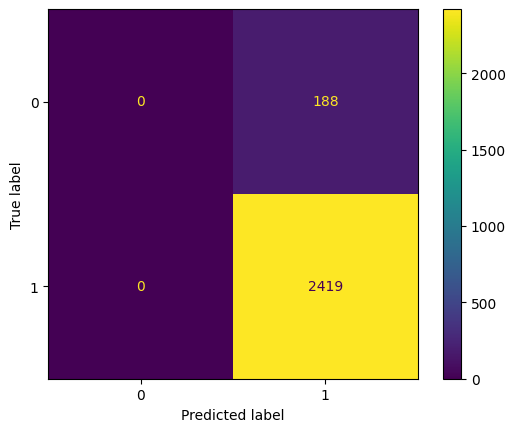

In [36]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, logit_pred2)

conf_matrix_display = ConfusionMatrixDisplay(conf_matrix).plot()

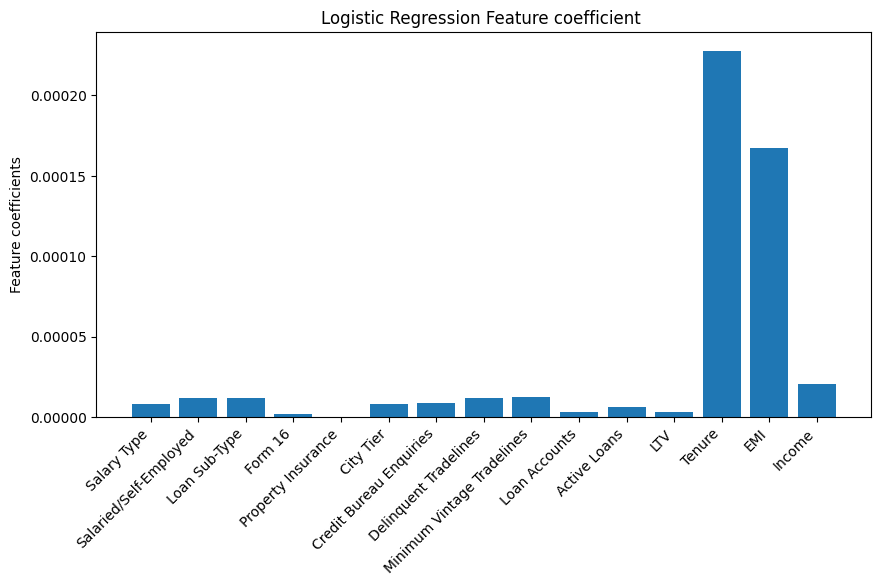

In [37]:
# Feature Importance Plot

feature_importance = best_logit_grid1.coef_
features = best_logit_grid1.feature_names_in_

feature_importance = np.squeeze(feature_importance) # converting to 1-dimensional

plt.figure(figsize=(10,5))

plt.bar(range(len(features)), feature_importance, align='center')
plt.xticks(range(len(features)), features)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Feature coefficients')
plt.title('Logistic Regression Feature coefficient ')
plt.show()

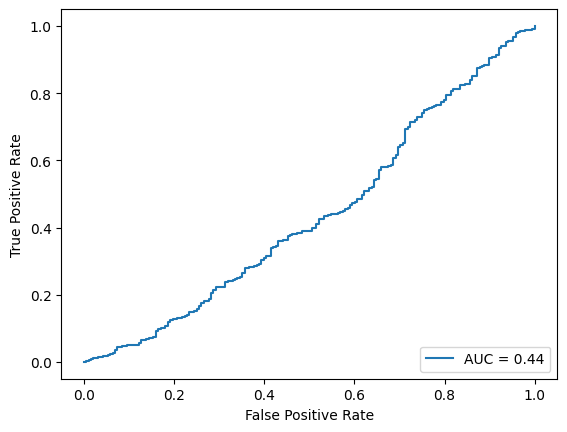

In [38]:
score = best_logit_grid1.decision_function(x_test)
fpr, tpr, _ = roc_curve(y_test, score, pos_label=best_logit_grid1.classes_[1])
auc = roc_auc_score(y_test, score)

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc).plot()

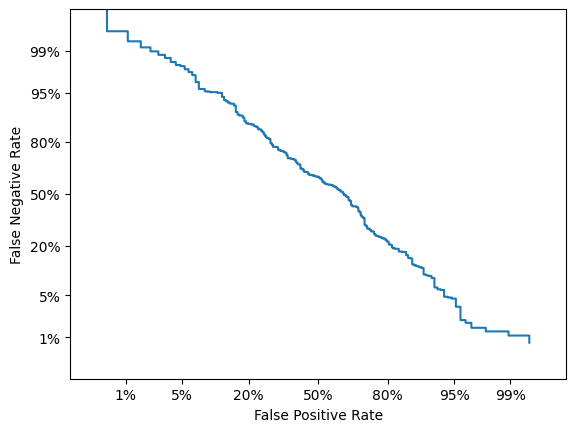

In [39]:
score = best_logit_grid1.decision_function(x_test)
fpr, fnr, _ = det_curve(y_test, score)
det_display = DetCurveDisplay(fpr=fpr, fnr=fnr).plot()

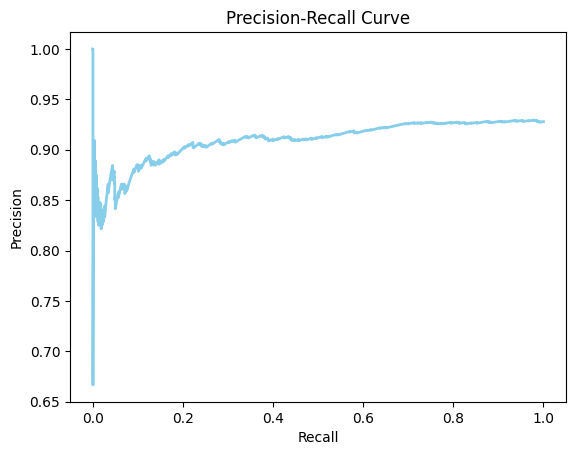

In [40]:
# Step 8: Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, score)

plt.plot(recall, precision, color='skyblue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### With training set

In [41]:
logit_pred3_train = best_logit_grid1.predict(X_train)

In [42]:
print('Accuracy Score {}'.format(accuracy_score(Y_train, logit_pred3_train)*100))

Accuracy Score 92.79685401879915


In [43]:
pd.crosstab(pd.Series(logit_pred3_train, name='Predicted'), pd.Series(Y_train, name='Actual'))

Actual,0,1
Predicted,,
1,599,7720


In [44]:
print(confusion_matrix(Y_train, logit_pred3_train))

[[   0  751]
 [   0 9675]]


In [45]:
print((classification_report(Y_train, logit_pred3_train)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       751
           1       0.93      1.00      0.96      9675

    accuracy                           0.93     10426
   macro avg       0.46      0.50      0.48     10426
weighted avg       0.86      0.93      0.89     10426



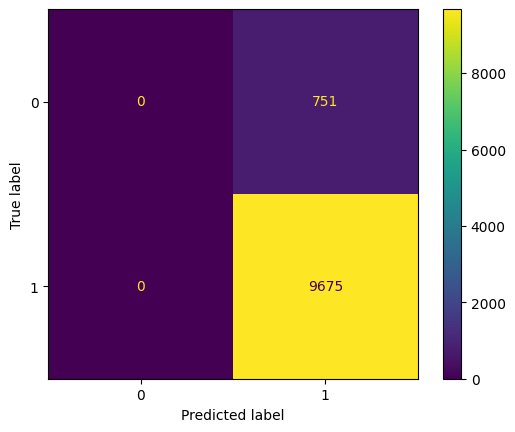

In [46]:
#Confusion Matrix
conf_matrix = confusion_matrix(Y_train, logit_pred3_train)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.show()

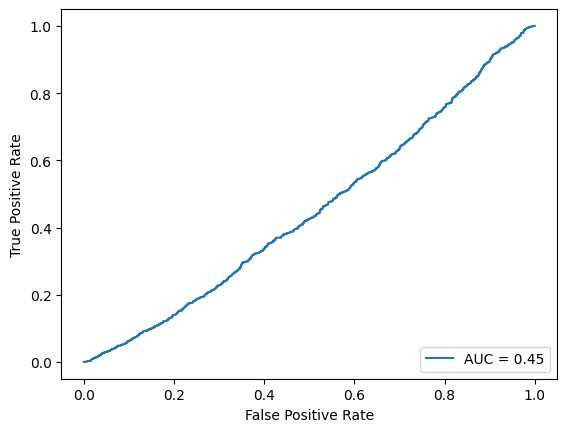

In [47]:
score = best_logit_grid1.decision_function(X_train)
fpr, tpr, _ = roc_curve(Y_train, score, pos_label=best_logit_grid1.classes_[1])
auc = roc_auc_score(Y_train, score)

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc).plot()

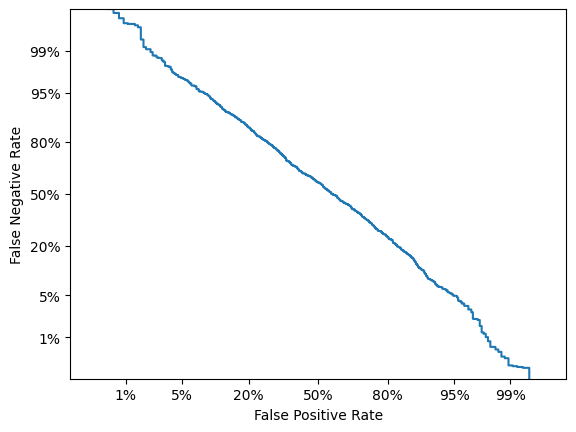

In [48]:
score = best_logit_grid1.decision_function(X_train)
fpr, fnr, _ = det_curve(Y_train, score)
det_display = DetCurveDisplay(fpr=fpr, fnr=fnr).plot()

### Saving the model

In [231]:
joblib.dump(best_logit_grid1, 'Logistic1_Imbalanced_Model.joblib')

['Logistic1_Imbalanced_Model.joblib']

In [354]:
# Loading the model

#loaded_best_logit_grid1 = joblib.load('Logistic1_Imbalanced.joblib')

In [355]:
#loaded_best_logit_grid1

## XGBoost Classifier

### With testing set

In [49]:
# Initializing
XGB_model1 = XGBClassifier()

In [50]:
XGB_model1.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [51]:
xgb_pred1 = XGB_model1.predict(x_test)

In [52]:
print('Accuracy:', accuracy_score(y_test, xgb_pred1)*100)

Accuracy: 92.59685462217108


In [53]:
print(confusion_matrix(y_test, xgb_pred1))

[[   7  181]
 [  12 2407]]


In [54]:
print(classification_report(y_test, xgb_pred1))#, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.37      0.04      0.07       188
           1       0.93      1.00      0.96      2419

    accuracy                           0.93      2607
   macro avg       0.65      0.52      0.51      2607
weighted avg       0.89      0.93      0.90      2607



### Hyperparameter Tuning

In [55]:
params={
"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
"max_depth"        : [3, 4, 5, 6, 8, 10, 12, 15],
"min_child_weight" : [1, 3, 5, 7],
"gamma"            : [0.0, 0.1, 0.2, 0.3, 0.4],
"colsample_bytree" : [0.3, 0.4, 0.5, 0.7, 0.9],
"booster"          : ['gbtree', 'dart'],
"tree_method"      : ['auto', 'exact', 'approx', 'hist'],
"objective"        : ['binary:logistic'],
"eval_metric"      : ['auc', 'aucpr', 'error', 'logloss'],
"max_delta_step"   : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

In [56]:
XGB_model2 = XGBClassifier()

In [57]:
%%time

cv2 = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)

xgb_grid1 = RandomizedSearchCV(estimator=XGB_model2, param_distributions=params, n_iter=5,
                               cv=cv2, scoring='roc_auc', random_state=100, n_jobs=-1, verbose=5)

xgb_grid1.fit(X_train, Y_train)

Fitting 20 folds for each of 5 candidates, totalling 100 fits
CPU times: total: 1.44 s
Wall time: 4min


RandomizedSearchCV(cv=ShuffleSplit(n_splits=20, random_state=0, test_size=0.2, train_size=None),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy...
                                        'eval_metric': ['auc', 'aucpr', 'error',
                                                        'logloss'],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_delta_step': [1, 2, 3, 4, 5, 6, 7,
                                                           8, 9, 10],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'objective': ['binary:logistic'],
                                        'tree_method': ['auto', 'exact',
                                                        'approx', 'hist']},
                   random_state=100, scoring='roc_auc', verbose=5)

In [58]:
xgb_grid1.best_params_

{'tree_method': 'hist',
 'objective': 'binary:logistic',
 'min_child_weight': 1,
 'max_depth': 8,
 'max_delta_step': 7,
 'learning_rate': 0.15,
 'gamma': 0.2,
 'eval_metric': 'aucpr',
 'colsample_bytree': 0.4,
 'booster': 'gbtree'}

In [59]:
best_xgb_grid1 = xgb_grid1.best_estimator_

In [60]:
best_xgb_grid1

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=7,
              max_depth=8, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [61]:
xgb_pred2 = best_xgb_grid1.predict(x_test)

In [62]:
print('Accuracy:', accuracy_score(y_test, xgb_pred2)*100)

Accuracy: 92.71192942079018


In [63]:
print(confusion_matrix(y_test, xgb_pred2))

[[   2  186]
 [   4 2415]]


In [64]:
pd.crosstab(pd.Series(xgb_pred2, name='Predicted'), pd.Series(y_test, name='Actual'))

Actual,0,1
Predicted,,
0,0,1
1,40,499


In [65]:
print(classification_report(y_test, xgb_pred2))#, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.33      0.01      0.02       188
           1       0.93      1.00      0.96      2419

    accuracy                           0.93      2607
   macro avg       0.63      0.50      0.49      2607
weighted avg       0.89      0.93      0.89      2607



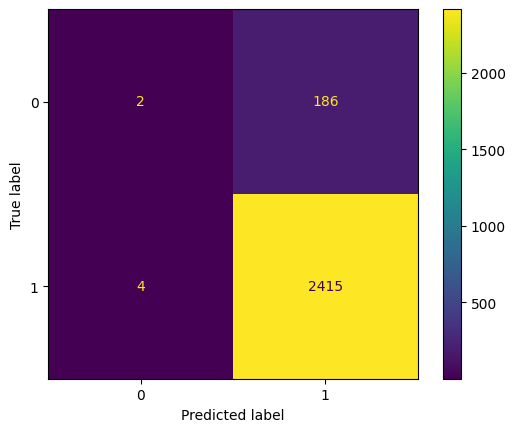

In [66]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, xgb_pred2)
conf_matrix_display = ConfusionMatrixDisplay(conf_matrix).plot()

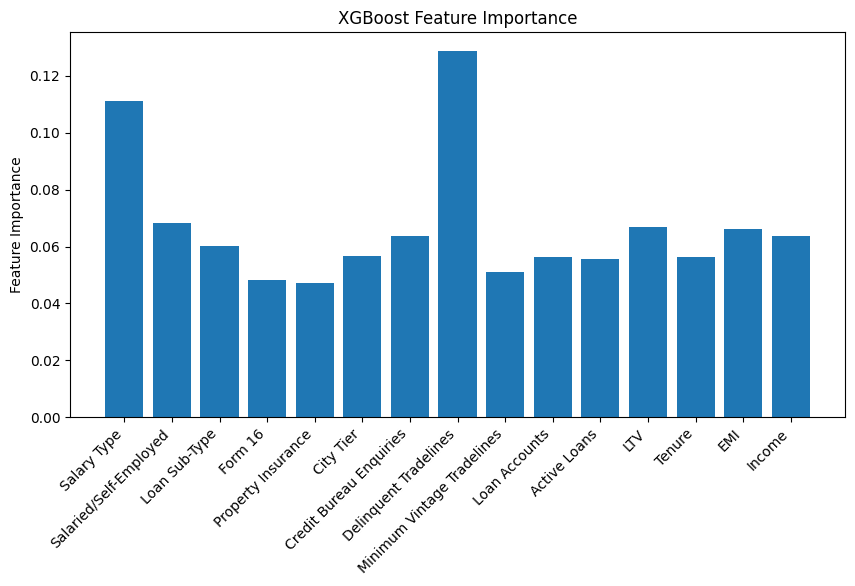

In [67]:
# Feature Importance Plot

feature_importance = best_xgb_grid1.feature_importances_
features = best_xgb_grid1.feature_names_in_

#feature_importance = np.squeeze(feature_importance) # converting to 1-dimensional

plt.figure(figsize=(10,5))

plt.bar(range(len(features)), feature_importance, align='center')
plt.xticks(range(len(features)), features)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Feature Importance')
plt.title('XGBoost Feature Importance')
plt.show()

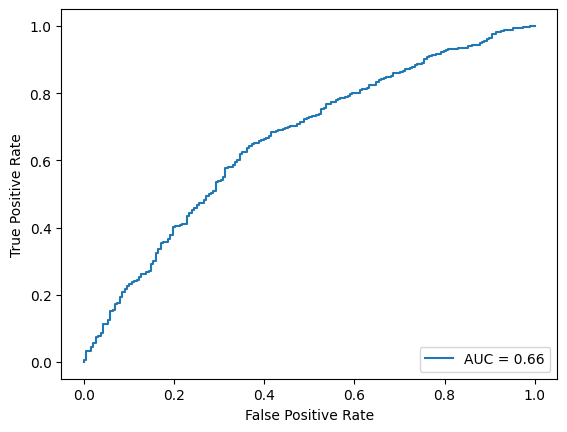

In [68]:
score = xgb_grid1.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, score)
auc = roc_auc_score(y_test, score)

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc).plot()

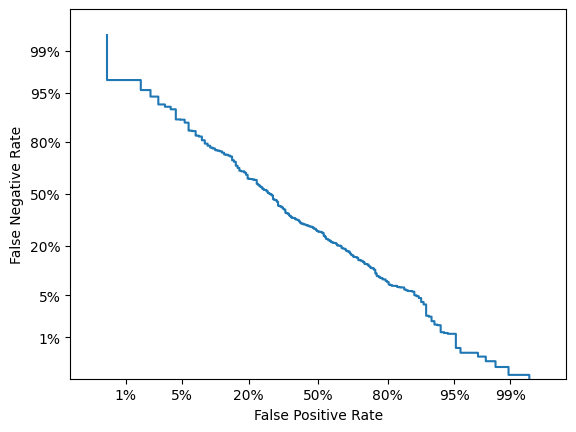

In [69]:
score = xgb_grid1.predict_proba(x_test)[:,1]
fpr, fnr, _ = det_curve(y_test, score)
det_display = DetCurveDisplay(fpr=fpr, fnr=fnr).plot()

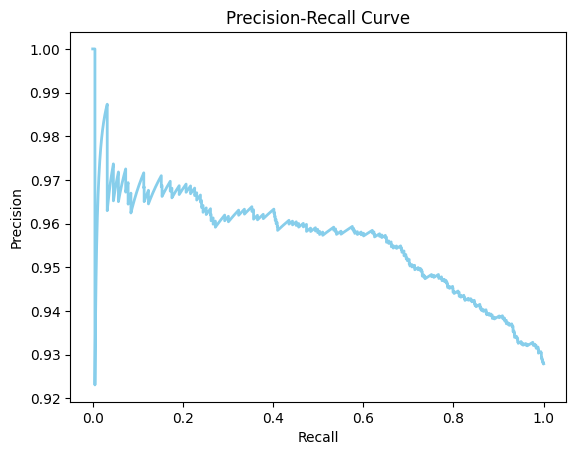

In [70]:
# Step 8: Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, score)

plt.plot(recall, precision, color='skyblue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### With training set

In [71]:
xgb_pred2_train = best_xgb_grid1.predict(X_train)

In [72]:
print('Accuracy Score {}'.format(accuracy_score(Y_train, xgb_pred2_train)*100))

Accuracy Score 95.2714367926338


In [73]:
pd.crosstab(pd.Series(xgb_pred2_train, name='Predicted'), pd.Series(Y_train, name='Actual'))

Actual,0,1
Predicted,,
0,12,208
1,587,7512


In [74]:
print(confusion_matrix(Y_train, xgb_pred2_train))

[[ 258  493]
 [   0 9675]]


In [75]:
print((classification_report(Y_train, xgb_pred2_train)))

              precision    recall  f1-score   support

           0       1.00      0.34      0.51       751
           1       0.95      1.00      0.98      9675

    accuracy                           0.95     10426
   macro avg       0.98      0.67      0.74     10426
weighted avg       0.96      0.95      0.94     10426



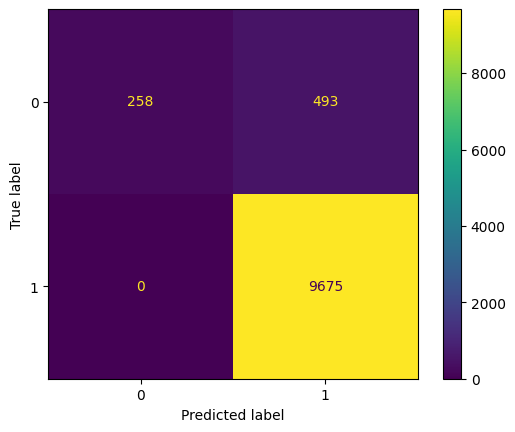

In [76]:
#Confusion Matrix
conf_matrix = confusion_matrix(Y_train, xgb_pred2_train)
conf_matrix_display = ConfusionMatrixDisplay(conf_matrix).plot()

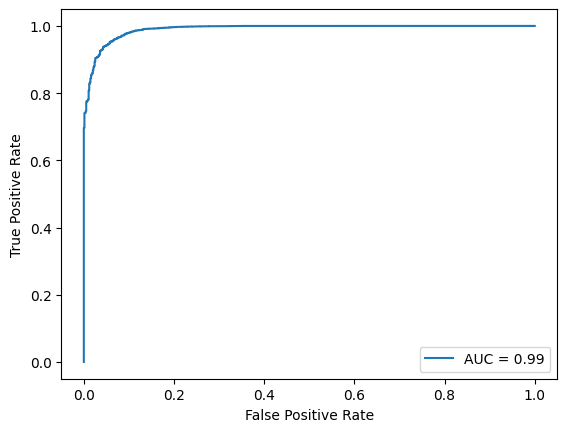

In [77]:
score = xgb_grid1.predict_proba(X_train)[:,1]
fpr, tpr, thresholds = roc_curve(Y_train, score)
auc = roc_auc_score(Y_train, score)

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc).plot()

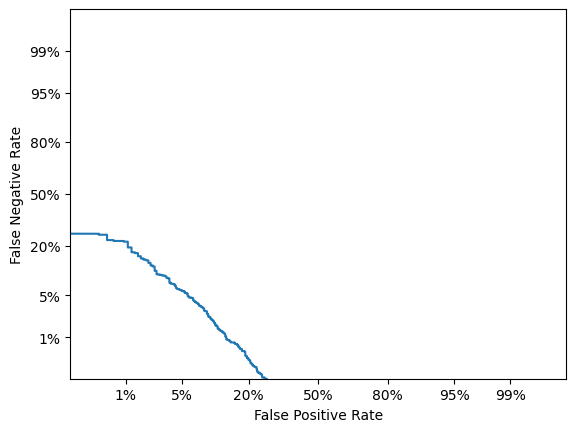

In [78]:
score = xgb_grid1.predict_proba(X_train)[:,1]
fpr, fnr, _ = det_curve(Y_train, score)
det_display = DetCurveDisplay(fpr=fpr, fnr=fnr).plot()

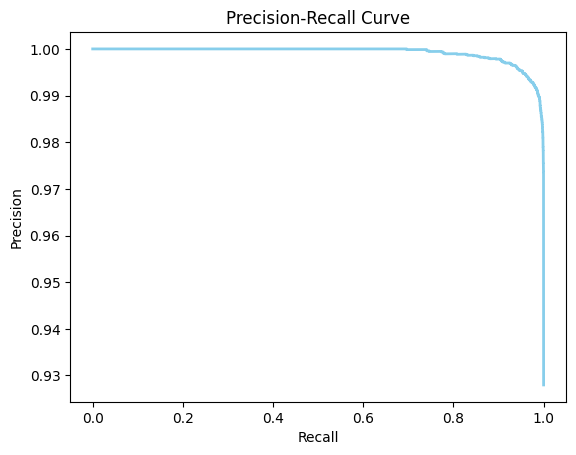

In [79]:
precision, recall, _ = precision_recall_curve(Y_train, score)

plt.plot(recall, precision, color='skyblue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### Saving the model

In [232]:
# Saving the model

joblib.dump(best_xgb_grid1, 'xgb1_Imbalanced_Model.joblib')

['xgb1_Imbalanced_Model.joblib']

In [ ]:
# Loading the model

#loaded_best_xgb_grid1 = joblib.load('xgb1_Imbalanced.joblib')

## Random Forest Classifier

### With testing set

In [80]:
rf_model1 = RandomForestClassifier(random_state=42)

In [81]:
rf_model1

RandomForestClassifier(random_state=42)

In [82]:
rf_model1.fit(X_train, Y_train)

rf_pred1 = rf_model1.predict(x_test)

print('Accuracy:', accuracy_score(y_test, rf_pred1)*100)

Accuracy: 92.86536248561565


In [83]:
print(confusion_matrix(y_test, rf_pred1))

[[   3  185]
 [   1 2418]]


In [84]:
print(classification_report(y_test, rf_pred1))

              precision    recall  f1-score   support

           0       0.75      0.02      0.03       188
           1       0.93      1.00      0.96      2419

    accuracy                           0.93      2607
   macro avg       0.84      0.51      0.50      2607
weighted avg       0.92      0.93      0.90      2607



### Hyperparameter Tuning

In [85]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]

# Number of features to consider at every split
max_features = [None, 'sqrt','log2']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10,1000,10)]

# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3, 4, 5, 6, 7, 8, 9, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion':['entropy','gini', 'logloss']}

In [95]:
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 'max_features': [None, 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'criterion': ['entropy', 'gini', 'logloss']}


In [86]:
%%time

rf_model2 = RandomForestClassifier(random_state=42)

cv3 = ShuffleSplit(n_splits=5, test_size=0.4, random_state=0)

rf_grid1 = RandomizedSearchCV(estimator=rf_model2, param_distributions=random_grid, cv=cv3, n_iter=10, verbose=3,
                               random_state=100, n_jobs=-1)

rf_grid1.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
CPU times: total: 23 s
Wall time: 9min 43s


RandomizedSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.4, train_size=None),
                   estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini',
                                                      'logloss'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11, 12,
                                                              13, 14, 15],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500, 1600,
                                                         1700, 1800, 1900,
                                                         2000]},
                   random_state=100, verbose=3)

In [87]:
rf_grid1.best_params_

{'n_estimators': 900,
 'min_samples_split': 4,
 'min_samples_leaf': 8,
 'max_features': 'sqrt',
 'max_depth': 450,
 'criterion': 'entropy'}

In [88]:
best_rf_grid1 = rf_grid1.best_estimator_

In [89]:
best_rf_grid1

RandomForestClassifier(criterion='entropy', max_depth=450, min_samples_leaf=8,
                       min_samples_split=4, n_estimators=900, random_state=42)

In [90]:
rf_pred2 = best_rf_grid1.predict(x_test)

In [91]:
print('Accuracy:', accuracy_score(y_test, rf_pred2)*100)

Accuracy: 92.78864595320292


In [92]:
print(confusion_matrix(y_test, rf_pred2))

[[   0  188]
 [   0 2419]]


In [93]:
print(classification_report(y_test, rf_pred2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       188
           1       0.93      1.00      0.96      2419

    accuracy                           0.93      2607
   macro avg       0.46      0.50      0.48      2607
weighted avg       0.86      0.93      0.89      2607



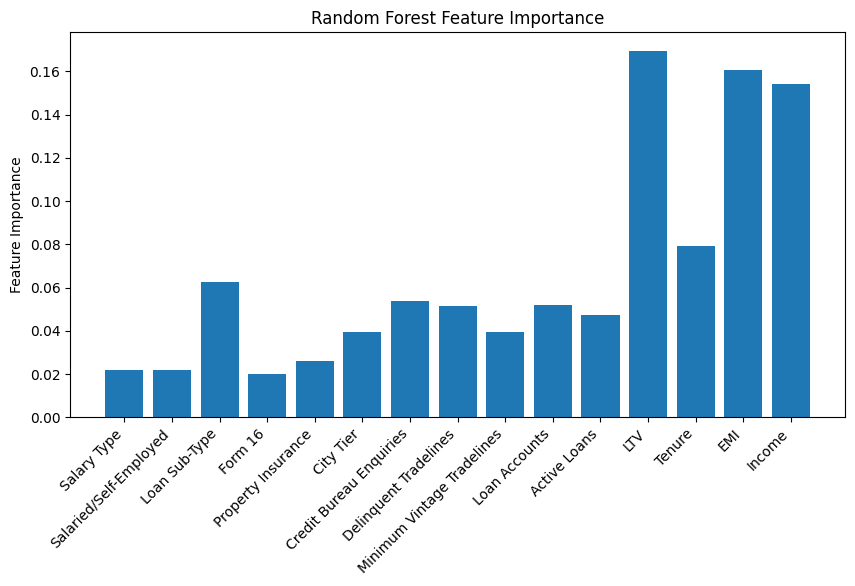

In [94]:
# Feature Importance Plot

feature_importance = best_rf_grid1.feature_importances_
features = X.columns

plt.figure(figsize=(10,5))

plt.bar(range(len(features)), feature_importance, align='center')
plt.xticks(range(len(features)), features)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

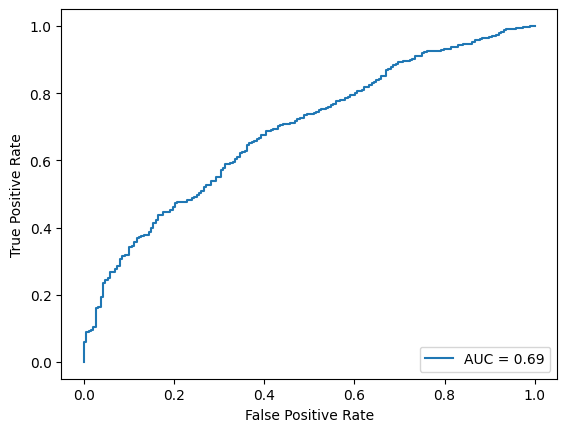

In [95]:
# ROC Curve
score = rf_grid1.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, score)
auc = roc_auc_score(y_test, score)

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc).plot()

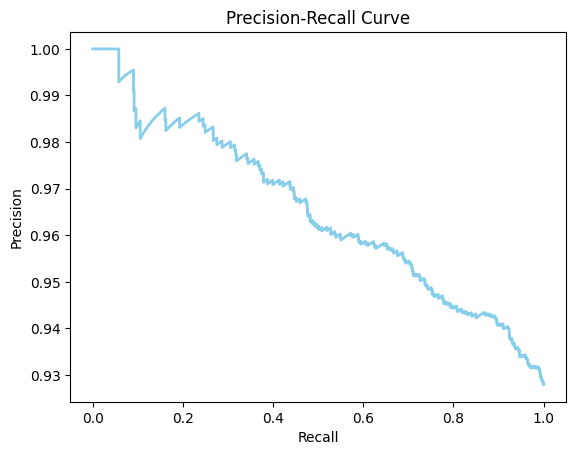

In [96]:
# Step 8: Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, score)

plt.plot(recall, precision, color='skyblue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

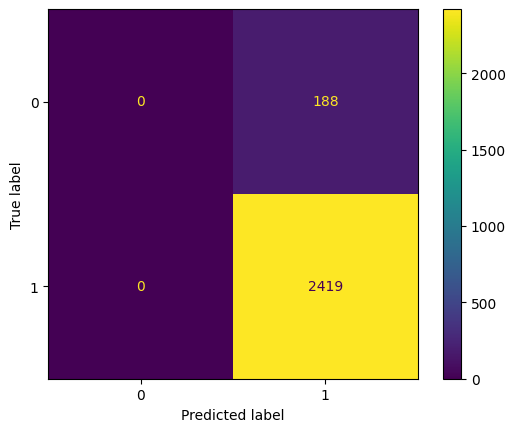

In [97]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, rf_pred2)

conf_matrix_display = ConfusionMatrixDisplay(conf_matrix).plot()

### With training data

In [98]:
rf_pred2_tr = best_rf_grid1.predict(X_train)

In [99]:
print('Accuracy:', accuracy_score(Y_train, rf_pred2_tr)*100)

Accuracy: 92.79685401879915


In [ ]:
#[[ 749    0]
# [   0 9643]]

In [100]:
print(confusion_matrix(Y_train, rf_pred2_tr))

[[   0  751]
 [   0 9675]]


In [101]:
print(classification_report(Y_train, rf_pred2_tr))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       751
           1       0.93      1.00      0.96      9675

    accuracy                           0.93     10426
   macro avg       0.46      0.50      0.48     10426
weighted avg       0.86      0.93      0.89     10426



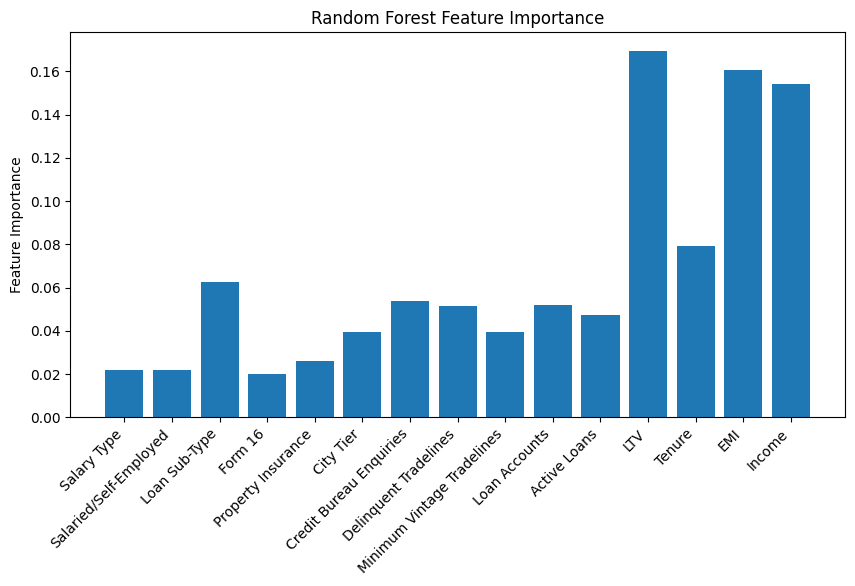

In [102]:
# Feature Importance Plot

feature_importance = best_rf_grid1.feature_importances_
features = X.columns

plt.figure(figsize=(10,5))

plt.bar(range(len(features)), feature_importance, align='center')
plt.xticks(range(len(features)), features)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

### Saving the model

In [233]:
# Saving the model

joblib.dump(best_rf_grid1, 'RFClassifier1_Imbalanced_Model.joblib')

['RFClassifier1_Imbalanced_Model.joblib']

In [ ]:
# Loading the model

#loaded_best_rf_grid1 = joblib.load('RFClassifier1_Imbalanced.joblib')

# Balancing the target feature using SMOTE

## Oversampling

In [103]:
from imblearn.over_sampling import SMOTE

# Resampling the minority class
sm = SMOTE(sampling_strategy='minority', random_state=42)

# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(X, Y)

oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [104]:
oversampled['Status'].value_counts()

Status
1    12094
0    12094
Name: count, dtype: int64

In [105]:
oversampled.shape

(24188, 16)

In [106]:
X_sm = oversampled.drop('Status',axis=1)

Y_sm = oversampled['Status']

In [241]:
x_train1.head()

,Salary Type,Salaried/Self-Employed,Loan Sub-Type,Form 16,Property Insurance,City Tier,Credit Bureau Enquiries,Delinquent Tradelines,Minimum Vintage Tradelines,Loan Accounts,Active Loans,LTV,Tenure,EMI,Income
7293,0,2,3,0,1,1,0,1,1,1,1,0.432909,10,8069,1.828937
22189,0,1,0,1,0,1,0,0,1,0,0,0.492735,20,13330,1.827591
8240,1,1,3,0,1,0,0,0,1,0,1,0.490020,20,11780,1.827050
7568,1,1,1,0,0,1,0,1,0,2,1,0.810614,20,17275,1.828106
11467,0,2,4,1,0,2,3,1,3,1,1,0.550000,20,18340,1.830844


In [107]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_sm, Y_sm, test_size=0.2, random_state=42)

In [108]:
x_train1.shape, x_test1.shape, y_train1.shape, y_test1.shape

((19350, 15), (4838, 15), (19350,), (4838,))

## Undersampling

In [109]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

# Fit and transform the training data
under_sampled_X, under_sampled_Y = rus.fit_resample(X, Y)

under_sampled = pd.concat([pd.DataFrame(under_sampled_Y), pd.DataFrame(under_sampled_X)], axis=1)

In [110]:
under_sampled['Status'].value_counts()

Status
0    939
1    939
Name: count, dtype: int64

In [111]:
under_sampled.shape

(1878, 16)

In [112]:
X_um = under_sampled.drop('Status',axis=1)

Y_um = under_sampled['Status']

In [113]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X_um, Y_um, test_size=0.2, random_state=42)

In [114]:
x_train2.shape, x_test2.shape

((1502, 15), (376, 15))

# Logistic Regression (Balanced)

## Oversampling

In [115]:
# Initializing the model
logit_sm = LogisticRegression(random_state=42) 

In [116]:
logit_model_sm = logit_sm.fit(x_train1, y_train1)

In [117]:
logit_pred_sm = logit_model_sm.predict(x_test1)

In [118]:
print('Accuracy:', logit_model_sm.score(x_test1, y_test1)*100)

Accuracy: 74.47292269532865


In [119]:
pd.crosstab(pd.Series(logit_pred_sm, name='Predicted'), pd.Series(y_test1, name='Actual'))

Actual,0,1
Predicted,,
0,30,459
1,41,457


In [120]:
print(confusion_matrix(y_test1, logit_pred_sm))

[[1822  626]
 [ 609 1781]]


In [121]:
print(classification_report(y_test1, logit_pred_sm, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75      2448
           1       0.74      0.75      0.74      2390

    accuracy                           0.74      4838
   macro avg       0.74      0.74      0.74      4838
weighted avg       0.74      0.74      0.74      4838



## Undersampling

In [122]:
# Undersampling
logit_model_um = logit_sm.fit(x_train2, y_train2)

In [123]:
# Undersampling
logit_pred_um = logit_model_um.predict(x_test2)

In [124]:
# Undersampling
print('Accuracy:', logit_model_um.score(x_test2, y_test2)*100)

Accuracy: 57.71276595744681


In [125]:
# Undersamplinng
pd.crosstab(pd.Series(logit_pred_um, name='Predicted'), pd.Series(y_test1, name='Actual'))

Actual,0,1
Predicted,,
0,4,41
1,0,31


In [126]:
# Undersampling
print(confusion_matrix(y_test2, logit_pred_um))

[[114  70]
 [ 89 103]]


In [127]:
# Undersampling
print(classification_report(y_test2, logit_pred_um, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.56      0.62      0.59       184
           1       0.60      0.54      0.56       192

    accuracy                           0.58       376
   macro avg       0.58      0.58      0.58       376
weighted avg       0.58      0.58      0.58       376



## Hyperparameter Tuning

In [128]:
parameters ={
                'C':[float(x) for x in np.linspace(start = 0.01, stop = 1, num = 10)],
                 'penalty':['l1', 'l2', 'elasticnet'],
                 'solver':['lbfgs', 'sag', 'saga', 'newton-cholesky']
}

In [129]:
%%time
logit_sm1 = LogisticRegression()

cv1 = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)

logit_grid_sm1 = GridSearchCV(estimator=logit_sm1, param_grid=parameters, cv=cv1,  n_jobs=-1, verbose=3)

logit_grid_sm1.fit(x_train1, y_train1)

Fitting 20 folds for each of 120 candidates, totalling 2400 fits
CPU times: total: 4.56 s
Wall time: 2min 56s


GridSearchCV(cv=ShuffleSplit(n_splits=20, random_state=0, test_size=0.2, train_size=None),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78,
                               0.89, 1.0],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'sag', 'saga', 'newton-cholesky']},
             verbose=3)

In [ ]:
#{'C': 0.23, 'penalty': 'l2', 'solver': 'newton-cholesky'}

In [130]:
logit_grid_sm1.best_params_

{'C': 0.78, 'penalty': 'l2', 'solver': 'newton-cholesky'}

In [131]:
best_logit_grid_sm1 = logit_grid_sm1.best_estimator_

In [132]:
best_logit_grid_sm1

LogisticRegression(C=0.78, solver='newton-cholesky')

In [136]:
logit_pred_sm1 = best_logit_grid_sm1.predict(x_test1) # oversampling test

In [137]:
logit_pred_sm2 = best_logit_grid_sm1.predict(x_train1) # oversampling train

In [138]:
logit_pred_um3 = best_logit_grid_sm1.predict(x_test2) # undersampling test

In [139]:
print('Accuracy Score {}'.format(accuracy_score(y_test1, logit_pred_sm1)*100))

Accuracy Score 81.91401405539479


In [140]:
print('Accuracy Score {}'.format(accuracy_score(y_train1, logit_pred_sm2)*100))

Accuracy Score 81.68475452196382


In [141]:
print('Accuracy Score {}'.format(accuracy_score(y_test2, logit_pred_um3)*100)) # undersampling

Accuracy Score 55.58510638297872


In [142]:
pd.crosstab(pd.Series(logit_pred_sm1, name='Predicted'), pd.Series(y_test1, name='Actual'))

Actual,0,1
Predicted,,
0,29,409
1,42,507


In [143]:
pd.crosstab(pd.Series(logit_pred_sm2, name='Predicted'), pd.Series(y_train1, name='Actual'))

Actual,0,1
Predicted,,
0,2610,4484
1,3174,5220


In [144]:
print(confusion_matrix(y_test1, logit_pred_sm1)) #test

[[1910  538]
 [ 337 2053]]


In [145]:
print(confusion_matrix(y_train1, logit_pred_sm2)) #train

[[7449 2197]
 [1347 8357]]


In [146]:
print(confusion_matrix(y_test2, logit_pred_um3)) #undersampling

[[ 41 143]
 [ 24 168]]


In [147]:
print((classification_report(y_test1, logit_pred_sm1)))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      2448
           1       0.79      0.86      0.82      2390

    accuracy                           0.82      4838
   macro avg       0.82      0.82      0.82      4838
weighted avg       0.82      0.82      0.82      4838



In [148]:
print((classification_report(y_train1, logit_pred_sm2)))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      9646
           1       0.79      0.86      0.83      9704

    accuracy                           0.82     19350
   macro avg       0.82      0.82      0.82     19350
weighted avg       0.82      0.82      0.82     19350



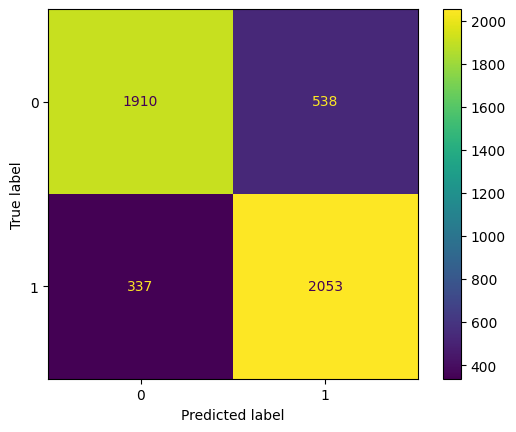

In [149]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test1, logit_pred_sm1)

conf_matrix_display = ConfusionMatrixDisplay(conf_matrix).plot()

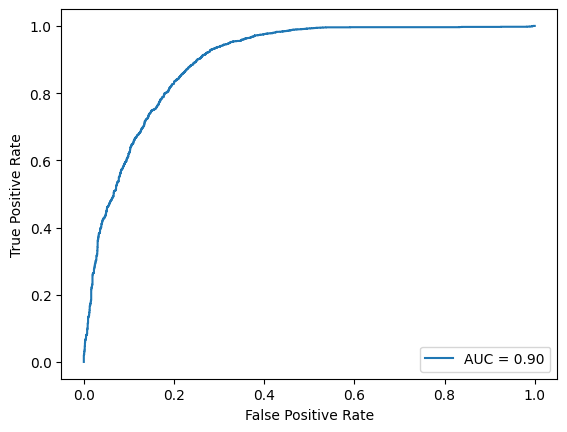

In [150]:
score = best_logit_grid_sm1.predict_proba(x_test1)[:,1]
fpr, tpr, thresholds = roc_curve(y_test1, score)
auc = roc_auc_score(y_test1, score)

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc).plot()

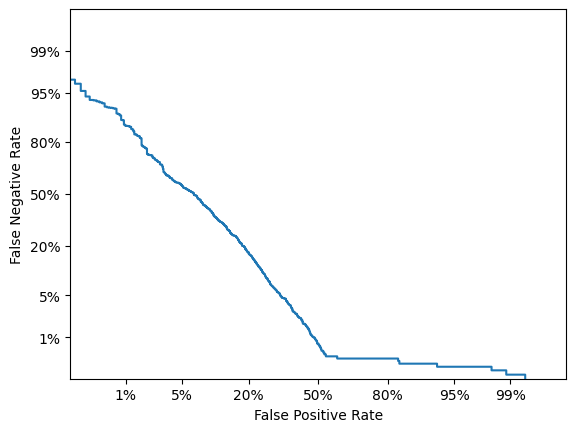

In [151]:
score = best_logit_grid_sm1.predict_proba(x_test1)[:,1]
fpr, fnr, _ = det_curve(y_test1, score)
det_display = DetCurveDisplay(fpr=fpr, fnr=fnr).plot()

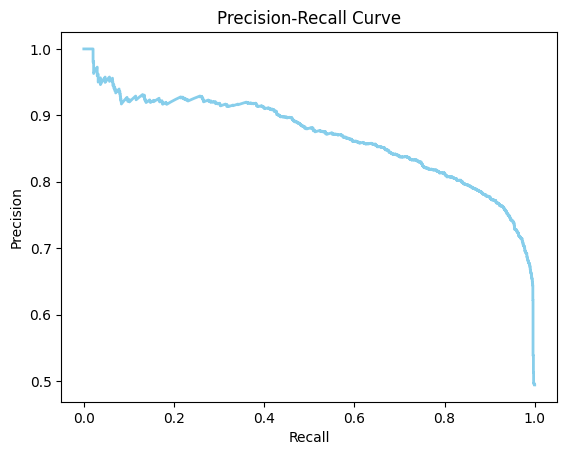

In [152]:
precision, recall, _ = precision_recall_curve(y_test1, score)

plt.plot(recall, precision, color='skyblue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

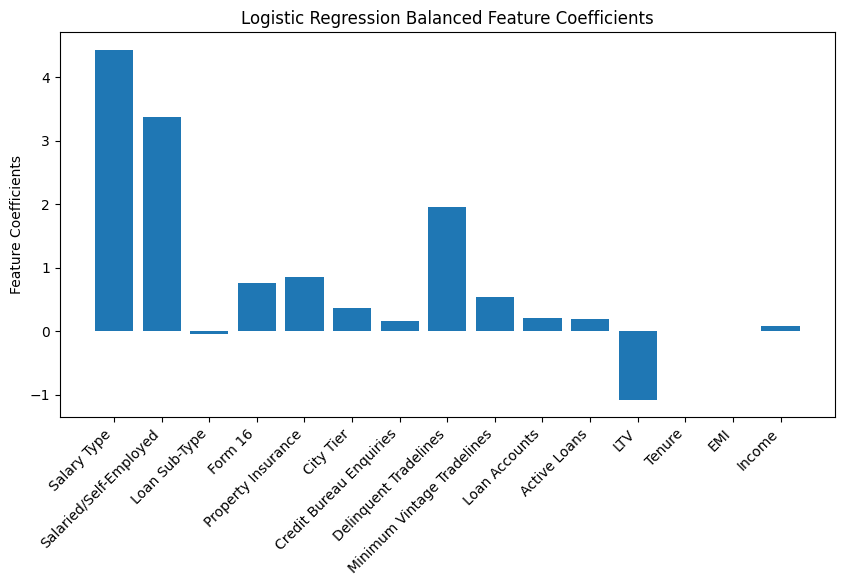

In [153]:
# Feature Importance Plot

feature_importance = best_logit_grid_sm1.coef_
feature_importance = np.squeeze(feature_importance)
features = best_logit_grid_sm1.feature_names_in_

plt.figure(figsize=(10,5))

plt.bar(range(len(features)), feature_importance, align='center')
plt.xticks(range(len(features)), features)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Feature Coefficients')
plt.title('Logistic Regression Balanced Feature Coefficients')
plt.show()

## Saving the model

In [234]:
# Saving the model

joblib.dump(best_logit_grid_sm1, 'Logistic2_Smote_Model.joblib')

['Logistic2_Smote_Model.joblib']

In [235]:
# Loading the model

#loaded_best_logit_grid_sm1 = joblib.load('Logistic2_Smote.joblib')

In [236]:
#loaded_best_logit_grid_sm1.coef_

In [237]:
# Feature Importance Plot

#feature_importance = loaded_best_logit_grid_sm1.coef_
#feature_importance = np.squeeze(feature_importance)
#features = loaded_best_logit_grid_sm1.feature_names_in_

#plt.figure(figsize=(10,5))

#plt.bar(range(len(features)), feature_importance, align='center')
#plt.xticks(range(len(features)), features)
#plt.xticks(rotation=45, ha='right')
#plt.ylabel('Feature Coefficients')
#plt.title('Logistic Regression Balanced Feature Coefficients')
#plt.show()

# XGBoost Classifier (Balanced)

In [154]:
# Initializing
XGB_model_sm1 = XGBClassifier(random_state = 42)

In [155]:
XGB_model_sm1.fit(x_train1, y_train1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
#XGB_model_sm1.fit(x_train2, y_train2)

In [156]:
xgb_pred_sm1 = XGB_model_sm1.predict(x_test1)

In [157]:
xgb_pred_sm2 = XGB_model_sm1.predict(x_train1)

In [ ]:
#xgb_pred_sm3 = XGB_model_sm1.predict(x_test2)

In [158]:
print('Accuracy:', accuracy_score(y_test1, xgb_pred_sm1)*100)

Accuracy: 92.24886316659777


In [159]:
print('Accuracy:', accuracy_score(y_train1, xgb_pred_sm2)*100)

Accuracy: 97.2609819121447


In [ ]:
#print('Accuracy:', accuracy_score(y_test2, xgb_pred_sm3)*100)

In [160]:
pd.crosstab(pd.Series(xgb_pred_sm1, name='Predicted'), pd.Series(y_test1, name='Actual'))

Actual,0,1
Predicted,,
0,27,445
1,44,471


In [161]:
pd.crosstab(pd.Series(xgb_pred_sm2, name='Predicted'), pd.Series(y_train1, name='Actual'))

Actual,0,1
Predicted,,
0,2859,4765
1,2925,4939


In [162]:
print(confusion_matrix(y_test1, xgb_pred_sm1))

[[2218  230]
 [ 145 2245]]


In [163]:
print(confusion_matrix(y_train1, xgb_pred_sm2))

[[9290  356]
 [ 174 9530]]


In [ ]:
#print(confusion_matrix(y_test2, xgb_pred_sm3))

In [164]:
print(classification_report(y_test1, xgb_pred_sm1))#, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      2448
           1       0.91      0.94      0.92      2390

    accuracy                           0.92      4838
   macro avg       0.92      0.92      0.92      4838
weighted avg       0.92      0.92      0.92      4838



In [165]:
print(classification_report(y_train1, xgb_pred_sm2))#, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      9646
           1       0.96      0.98      0.97      9704

    accuracy                           0.97     19350
   macro avg       0.97      0.97      0.97     19350
weighted avg       0.97      0.97      0.97     19350



In [ ]:
#print(classification_report(y_test2, xgb_pred_sm3))#, labels=[0,1]))

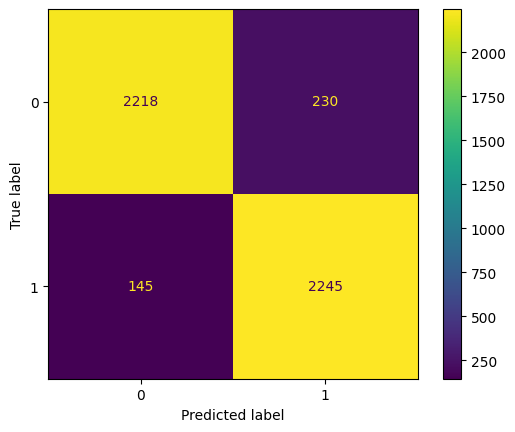

In [166]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test1, xgb_pred_sm1)

conf_matrix_display = ConfusionMatrixDisplay(conf_matrix).plot()

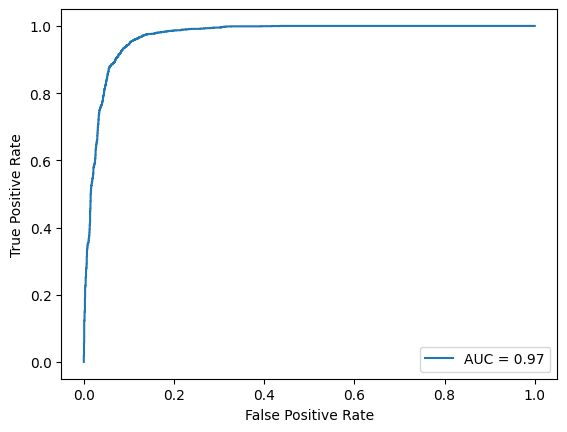

In [167]:
score = XGB_model_sm1.predict_proba(x_test1)[:,1]
fpr, tpr, thresholds = roc_curve(y_test1, score)
auc = roc_auc_score(y_test1, score)

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc).plot()

## Hyperparameter Tuning

In [168]:
params={
"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
"max_depth"        : [3, 4, 5, 6, 8, 10, 12, 15],
"min_child_weight" : [1, 3, 5, 7],
"gamma"            : [0.0, 0.1, 0.2, 0.3, 0.4],
"colsample_bytree" : [0.3, 0.4, 0.5, 0.7, 0.9],
"booster"          : ['gbtree', 'dart'],
"tree_method"      : ['auto', 'exact', 'approx', 'hist'],
"objective"        : ['binary:logistic'],
"eval_metric"      : ['auc', 'aucpr', 'error', 'logloss'],
"max_delta_step"   : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

In [169]:
XGB_model_sm2 = XGBClassifier()

In [170]:
%%time

cv2 = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)

xgb_grid_sm1 = RandomizedSearchCV(estimator=XGB_model_sm2, param_distributions=params, n_iter=10,
                               cv=cv2, scoring='roc_auc', random_state=100, n_jobs=-1, verbose=3)

xgb_grid_sm1.fit(x_train1, y_train1)

Fitting 30 folds for each of 10 candidates, totalling 300 fits
CPU times: total: 11.3 s
Wall time: 12min 54s


RandomizedSearchCV(cv=ShuffleSplit(n_splits=30, random_state=0, test_size=0.2, train_size=None),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy...
                                        'eval_metric': ['auc', 'aucpr', 'error',
                                                        'logloss'],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_delta_step': [1, 2, 3, 4, 5, 6, 7,
                                                           8, 9, 10],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'objective': ['binary:logistic'],
                                        'tree_method': ['auto', 'exact',
                                                        'approx', 'hist']},
                   random_state=100, scoring='roc_auc', verbose=3)

In [171]:
xgb_grid_sm1.best_params_

{'tree_method': 'approx',
 'objective': 'binary:logistic',
 'min_child_weight': 1,
 'max_depth': 12,
 'max_delta_step': 6,
 'learning_rate': 0.05,
 'gamma': 0.2,
 'eval_metric': 'auc',
 'colsample_bytree': 0.9,
 'booster': 'gbtree'}

In [172]:
best_xgb_grid_sm1 = xgb_grid_sm1.best_estimator_

In [173]:
best_xgb_grid_sm1

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=6,
              max_depth=12, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [174]:
xgb_pred_sm3 = best_xgb_grid_sm1.predict(x_test1)

In [175]:
xgb_pred_sm4 = best_xgb_grid_sm1.predict(x_train1)

In [176]:
print('Accuracy:', accuracy_score(y_test1, xgb_pred_sm3)*100) 

Accuracy: 92.51756924348904


In [177]:
print('Accuracy:', accuracy_score(y_train1, xgb_pred_sm4)*100)

Accuracy: 98.42894056847545


In [178]:
print(confusion_matrix(y_test1, xgb_pred_sm3))

[[2230  218]
 [ 144 2246]]


In [179]:
print(confusion_matrix(y_train1, xgb_pred_sm4))

[[9422  224]
 [  80 9624]]


In [180]:
pd.crosstab(pd.Series(xgb_pred_sm3, name='Predicted'), pd.Series(y_test1, name='Actual'))

Actual,0,1
Predicted,,
0,27,449
1,44,467


In [181]:
pd.crosstab(pd.Series(xgb_pred_sm4, name='Predicted'), pd.Series(y_train1, name='Actual'))

Actual,0,1
Predicted,,
0,2878,4770
1,2906,4934


In [182]:
print(classification_report(y_test1, xgb_pred_sm3)) # test data

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      2448
           1       0.91      0.94      0.93      2390

    accuracy                           0.93      4838
   macro avg       0.93      0.93      0.93      4838
weighted avg       0.93      0.93      0.93      4838



In [183]:
print(classification_report(y_train1, xgb_pred_sm4)) # training data

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      9646
           1       0.98      0.99      0.98      9704

    accuracy                           0.98     19350
   macro avg       0.98      0.98      0.98     19350
weighted avg       0.98      0.98      0.98     19350



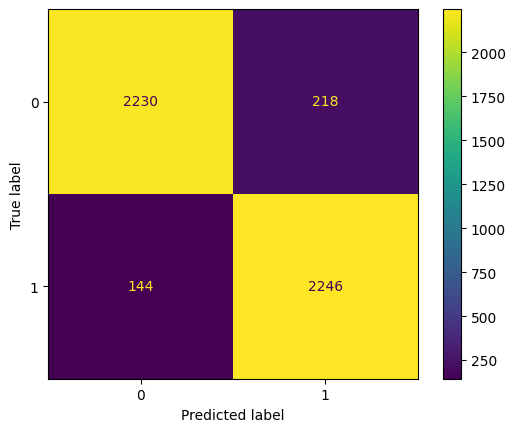

In [184]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test1, xgb_pred_sm3)

conf_matrix_display = ConfusionMatrixDisplay(conf_matrix).plot()

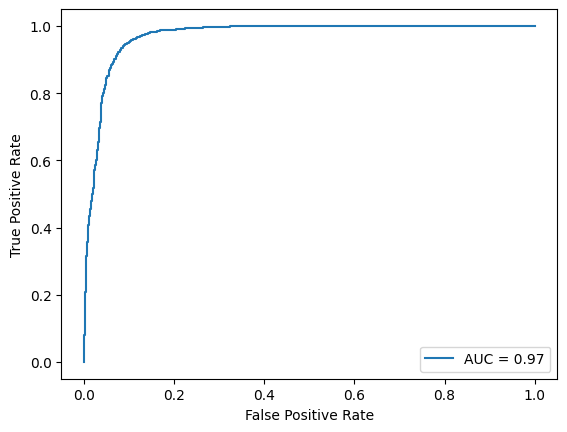

In [185]:
score = xgb_grid_sm1.predict_proba(x_test1)[:,1]
fpr, tpr, thresholds = roc_curve(y_test1, score)
auc = roc_auc_score(y_test1, score)

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc).plot()

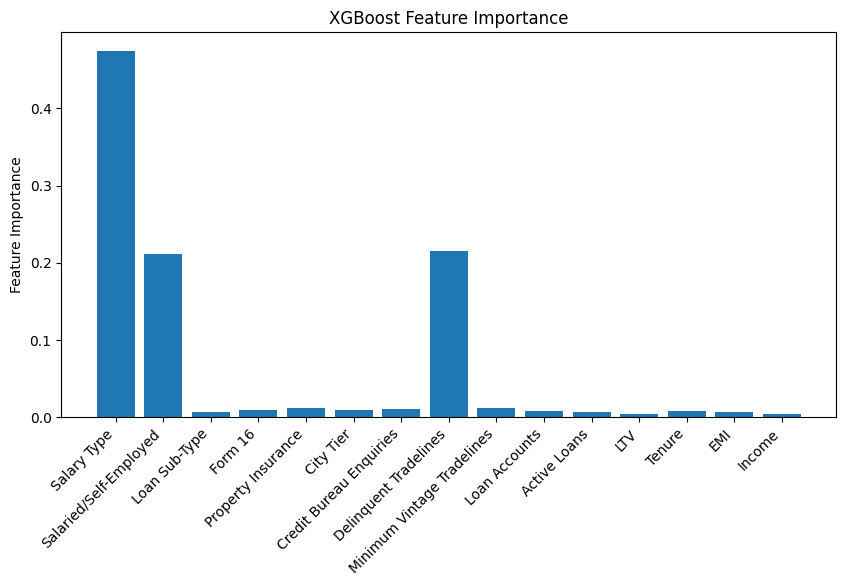

In [186]:
# Feature Importance Plot

feature_importance = best_xgb_grid_sm1.feature_importances_
features = best_xgb_grid_sm1.feature_names_in_

#feature_importance = np.squeeze(feature_importance) # converting to 1-dimensional

plt.figure(figsize=(10,5))

plt.bar(range(len(features)), feature_importance, align='center')
plt.xticks(range(len(features)), features)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Feature Importance')
plt.title('XGBoost Feature Importance')
plt.show()

## Saving the model

In [238]:
# Saving the model

joblib.dump(best_xgb_grid_sm1, 'XGB2_Smote_Model.joblib')

['XGB2_Smote_Model.joblib']

In [ ]:
# Loading the model

#loaded_best_xgb_grid_sm1 = joblib.load('XGB2_Smote.joblib')

# Random Forest Classifier (Balanced)

In [187]:
rf_model_sm1 = RandomForestClassifier(random_state = 42)
rf_model_um1 = RandomForestClassifier(random_state = 42)

In [188]:
rf_model_sm1.fit(x_train1, y_train1) #oversampling

RandomForestClassifier(random_state=42)

In [189]:
rf_model_um1.fit(x_train2, y_train2) #undersampling

RandomForestClassifier(random_state=42)

In [190]:
rf_pred_sm1 = rf_model_sm1.predict(x_test1) #oversampling test

In [191]:
rf_pred_sm2 = rf_model_sm1.predict(x_train1) #oversampling train

In [192]:
rf_pred_um1 = rf_model_um1.predict(x_test2) #undersampling test

In [193]:
rf_pred_um2 = rf_model_um1.predict(x_train2) #undersampling train

In [194]:
print('Accuracy:', accuracy_score(y_test1, rf_pred_sm1)*100)

Accuracy: 92.70359652749069


In [195]:
print('Accuracy:', accuracy_score(y_train1, rf_pred_sm2)*100)

Accuracy: 100.0


In [196]:
print('Accuracy:', accuracy_score(y_test2, rf_pred_um1)*100) #undersampling test

Accuracy: 56.91489361702128


In [197]:
print('Accuracy:', accuracy_score(y_train2, rf_pred_um2)*100) #undersampling train

Accuracy: 100.0


In [198]:
pd.crosstab(pd.Series(rf_pred_sm1, name='Predicted'), pd.Series(y_test1, name='Actual'))

Actual,0,1
Predicted,,
0,29,448
1,42,468


In [199]:
pd.crosstab(pd.Series(rf_pred_sm2, name='Predicted'), pd.Series(y_train1, name='Actual'))

Actual,0,1
Predicted,,
0,2921,4845
1,2863,4859


In [200]:
print(confusion_matrix(y_test1, rf_pred_sm1)) #oversampling test

[[2233  215]
 [ 138 2252]]


In [201]:
print(confusion_matrix(y_train1, rf_pred_sm2)) #oversampling train

[[9646    0]
 [   0 9704]]


In [202]:
print(confusion_matrix(y_test2, rf_pred_um1)) #undersampling test

[[113  71]
 [ 91 101]]


In [203]:
print(confusion_matrix(y_train2, rf_pred_um2)) #undersampling train

[[755   0]
 [  0 747]]


In [204]:
print(classification_report(y_test1, rf_pred_sm1))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      2448
           1       0.91      0.94      0.93      2390

    accuracy                           0.93      4838
   macro avg       0.93      0.93      0.93      4838
weighted avg       0.93      0.93      0.93      4838



In [206]:
print(classification_report(y_train1, rf_pred_sm2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9646
           1       1.00      1.00      1.00      9704

    accuracy                           1.00     19350
   macro avg       1.00      1.00      1.00     19350
weighted avg       1.00      1.00      1.00     19350



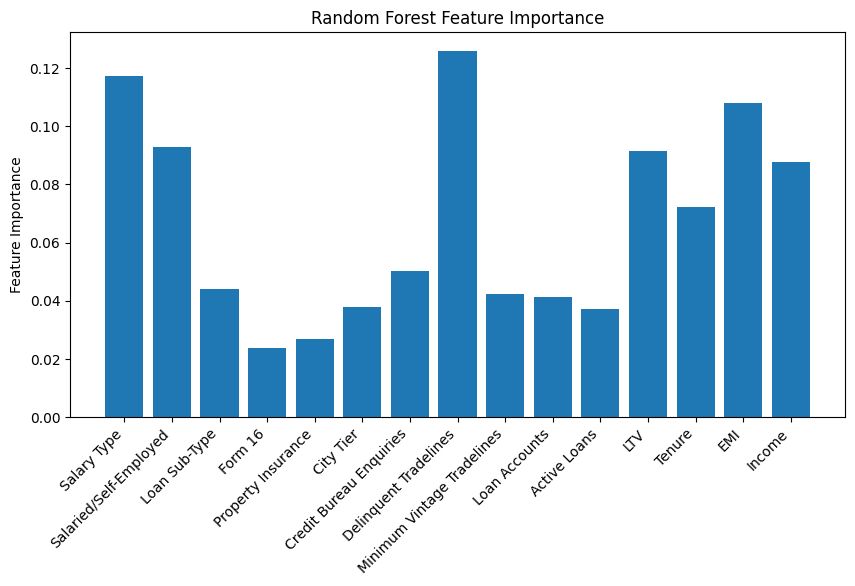

In [207]:
# Feature Importance Plot

feature_importance = rf_model_sm1.feature_importances_
features = rf_model_sm1.feature_names_in_

#feature_importance = np.squeeze(feature_importance) # converting to 1-dimensional

plt.figure(figsize=(10,5))

plt.bar(range(len(features)), feature_importance, align='center')
plt.xticks(range(len(features)), features)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

## Hyperparameter Tuning

In [208]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]

# Number of features to consider at every split
max_features = [None, 'sqrt','log2']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10,1000,10)]

# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3, 4, 5, 6, 7, 8, 9, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion':['entropy','gini', 'logloss']}

In [209]:
%%time

rf_model2 = RandomForestClassifier(random_state=42)

cv3 = ShuffleSplit(n_splits=5, test_size=0.4, random_state=0)

rf_grid1 = RandomizedSearchCV(estimator=rf_model2, param_distributions=random_grid, cv=cv3, n_iter=10, verbose=3,
                               random_state=100, n_jobs=-1)

rf_grid1.fit(x_train1, y_train1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
CPU times: total: 58.6 s
Wall time: 20min 4s


RandomizedSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.4, train_size=None),
                   estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini',
                                                      'logloss'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11, 12,
                                                              13, 14, 15],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500, 1600,
                                                         1700, 1800, 1900,
                                                         2000]},
                   random_state=100, verbose=3)

In [210]:
rf_grid1.best_params_

{'n_estimators': 900,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 670,
 'criterion': 'entropy'}

In [211]:
best_random_grid_sm = rf_grid1.best_estimator_

In [212]:
best_random_grid_sm

RandomForestClassifier(criterion='entropy', max_depth=670, max_features='log2',
                       min_samples_split=6, n_estimators=900, random_state=42)

In [213]:
y_pred_rf_sm_best1 = best_random_grid_sm.predict(x_test1)

In [214]:
y_pred_rf_sm_best2 = best_random_grid_sm.predict(x_train1)

In [215]:
print("Accuracy Score {}".format(accuracy_score(y_test1, y_pred_rf_sm_best1)*100)) #test

Accuracy Score 92.16618437370815


In [216]:
print("Accuracy Score {}".format(accuracy_score(y_train1, y_pred_rf_sm_best2)*100)) #train

Accuracy Score 98.83204134366925


In [217]:
print(confusion_matrix(y_test1, y_pred_rf_sm_best1))

[[2215  233]
 [ 146 2244]]


In [218]:
print(confusion_matrix(y_train1, y_pred_rf_sm_best2))

[[9452  194]
 [  32 9672]]


In [219]:
print((classification_report(y_test1, y_pred_rf_sm_best1)))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2448
           1       0.91      0.94      0.92      2390

    accuracy                           0.92      4838
   macro avg       0.92      0.92      0.92      4838
weighted avg       0.92      0.92      0.92      4838



In [220]:
print((classification_report(y_train1, y_pred_rf_sm_best2)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      9646
           1       0.98      1.00      0.99      9704

    accuracy                           0.99     19350
   macro avg       0.99      0.99      0.99     19350
weighted avg       0.99      0.99      0.99     19350



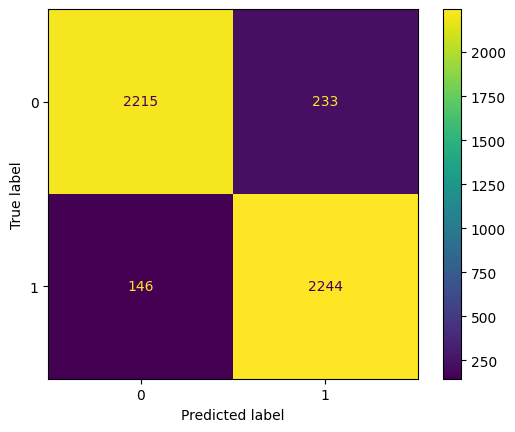

In [221]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test1, y_pred_rf_sm_best1)

conf_matrix_display = ConfusionMatrixDisplay(conf_matrix).plot()

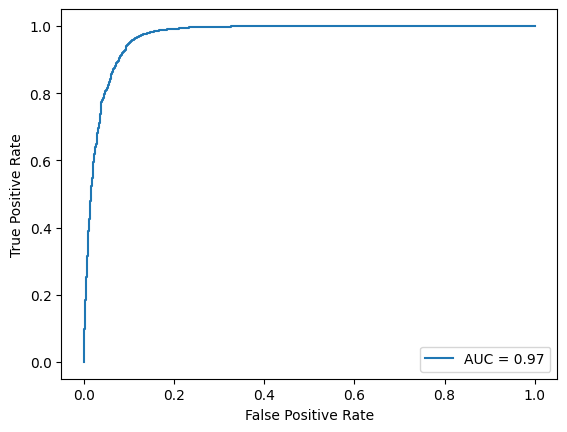

In [222]:
score = best_random_grid_sm.predict_proba(x_test1)[:,1]
fpr, tpr, thresholds = roc_curve(y_test1, score)
auc = roc_auc_score(y_test1, score)

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc).plot()

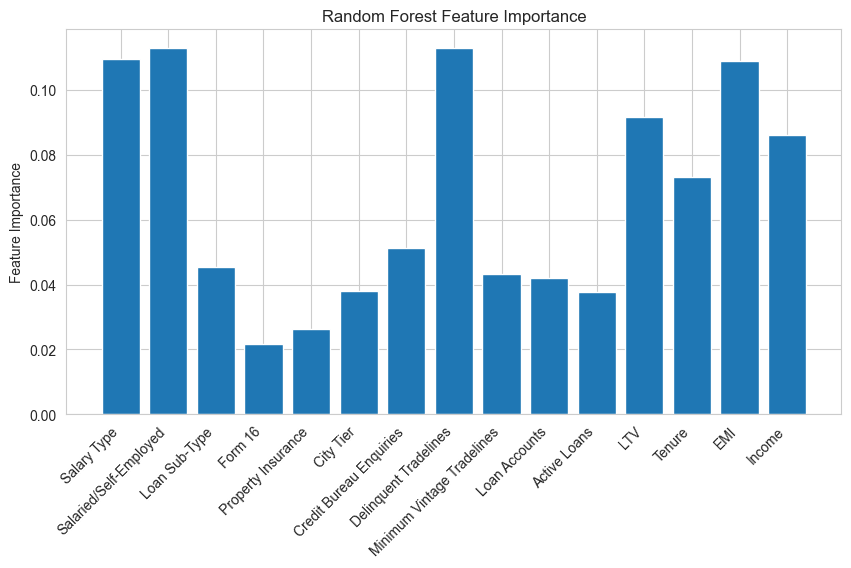

In [239]:
# Feature Importance Plot

feature_importance = best_random_grid_sm.feature_importances_
features = best_random_grid_sm.feature_names_in_

plt.figure(figsize=(10,5))

plt.bar(range(len(features)), feature_importance, align='center')
plt.xticks(range(len(features)), features)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

## Saving the model

In [240]:
# Saving the model

joblib.dump(best_random_grid_sm, 'RFClassifier2_Smote_Model.joblib')

['RFClassifier2_Smote_Model.joblib']

In [ ]:
# Loading the model

#loaded_best_random_grid_sm = joblib.load('RFClassifier2_Smote.joblib')